In [9]:
import blimpy
from blimpy import Waterfall
from blimpy import utils
from blimpy import plotting

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
%matplotlib inline


In [3]:
def grab_file_list(data_dir,file_type,node_number):
    '''
    returns h5 and dat file path from given directory, ordered correctly
    '''
    
    ## h5 list
    data_list = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            if filename[-len(file_type):] == file_type and node_number in filename:
                data_list.append(data_dir + filename)
                
    data_list = sorted(data_list, key=lambda x: (x,x.split('_')[5]))

    return data_list

In [17]:
def plotter(file,f_start,f_end):
    print('getting data',file)
    obs = Waterfall(file,f_start=f_start,f_stop=f_end)
    #grab data
    data = obs.data
    plot_f, plot_data = obs.grab_data(f_start,f_end)
    plot_data = plot_data.astype('float32')
    print('got data')

    #
    MAX_PLT_POINTS      = 65536                  # Max number of points in matplotlib plot
    MAX_IMSHOW_POINTS   = (8192, 4096)           # Max number of points in imshow plot


    dec_fac_x, dec_fac_y = 1, 1
    if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = int(plot_data.shape[0] / MAX_IMSHOW_POINTS[0])

    if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y = int(plot_data.shape[1] / MAX_IMSHOW_POINTS[1])
        
    plot_data = utils.rebin(plot_data, dec_fac_x, dec_fac_y)
    extent = plotting.plot_utils.calc_extent(obs, plot_f=plot_f, plot_t=obs.timestamps, MJD_time=60098.829675925925)
    
    reverse=False
    if reverse==True:
            plot_data = plot_data[..., ::-1]  # Reverse data
            plot_f = plot_f[::-1]
    plt.imshow(plot_data,
                   aspect='auto',
                   origin='lower',
                   rasterized=True,
                   interpolation='nearest',
                   extent = extent,
                   cmap='viridis',
                   )
    plt.colorbar()
    plt.rcParams["figure.figsize"] = (10,3)
    plt.xlabel("freq Mhz")
    plt.gca().invert_yaxis()
    print('plotted')

    return plot_data, extent

In [3]:
data_dir = '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/HIP70497lband/'
all_hits = pd.read_csv(data_dir+'master.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


In [4]:
all_hits.head(n=20)

Unnamed: 0  TopHitNum  DriftRate        SNR         Freq  ChanIndx  \
0          51         52   3.908230  10.779864  1624.839893    931118   
1        3926         36   0.795932  13.133806  1624.846847    928629   
2        1617       1618  -0.397966  15.870357  1174.551456    614923   
3        4350       1957  -0.387762  20.354977  1174.551205    615013   
4        7408       2017  -0.336740  16.783516  1174.550970    615097   

     FreqStart      FreqEnd  CoarseChanNum  FullNumHitsInRange  \
0  1624.839893  1624.839893             21                   1   
1  1624.846847  1624.846847             21                   1   
2  1174.551456  1174.551456             47                   1   
3  1174.551205  1174.551205             47                   1   
4  1174.550970  1174.550970             47                   1   

                                              FileID    Source           MJD  \
0  blc43_guppi_60095_70975_HIP70497_0100.rawspec....  HIP70497  60095.821470   
1  blc43_guppi_60095_72257_HIP70497_0104.rawspec....  HIP70497  60095.836308   
2  blc45_guppi_60095_70975_HIP70497_0100.rawspec....  HIP70497  60095.821470   
3  blc45_guppi_60095_71615_HIP70497_0102.rawspec....  HIP70497  60095.828877   
4  blc45_guppi_60095_72257_HIP70497_0104.rawspec....  HIP70497  60095.836308   

          RA      DEC     DELTAT    DELTAF  max_drift_rate  obs_length  \
0  14.419767  51.8490  18.253611 -2.793968             4.0  292.057776   
1  14.423267  51.8017  18.253611 -2.793968             4.0  292.057776   
2  14.419767  51.8490  18.253611 -2.793968             4.0  292.057776   
3  14.433420  51.7515  18.253611 -2.793968             4.0  292.057776   
4  14.423267  51.8017  18.253611 -2.793968             4.0  292.057776   

          Hit_ID      status  in_n_ons  RFI_in_range  delta_t  
0    HIP70497_51  on_table_1       2.0             0      0.0  
1    HIP70497_51  on_table_3       NaN             0   1282.0  
2  HIP70497_1617  on_table_1       2.0             0      0.0  
3  HIP70497_1617  on_table_2       NaN             0    640.0  
4  HIP70497_1617  on_table_3       NaN             0   1282.0

In [5]:
set([i[:5] for i in np.array(all_hits["FileID"])])

{'blc43', 'blc45'}

In [18]:
h5_list_path = grab_file_list(data_dir, '.h5','blc43')


In [19]:
len(all_hits)

6

================================ 0 =======================
blc03
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.

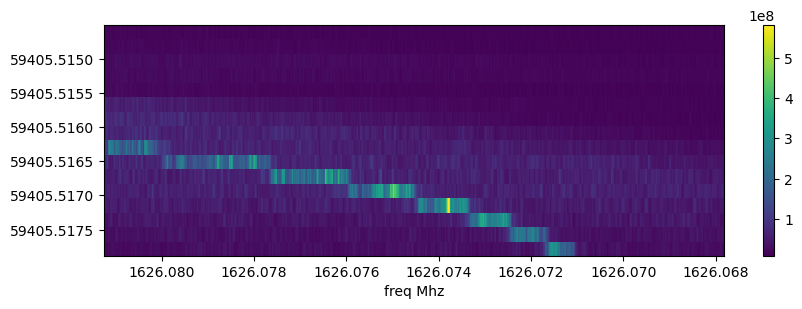

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


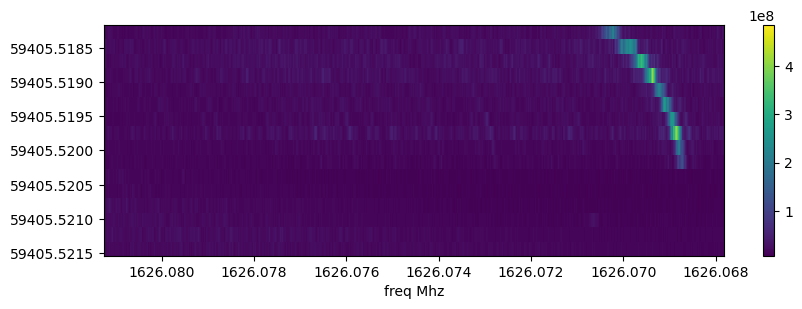

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


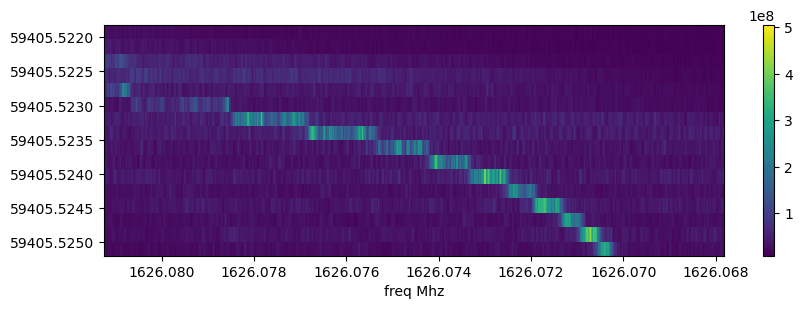

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


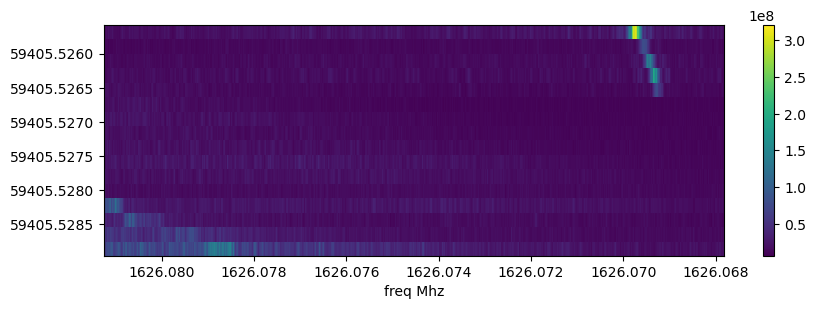

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


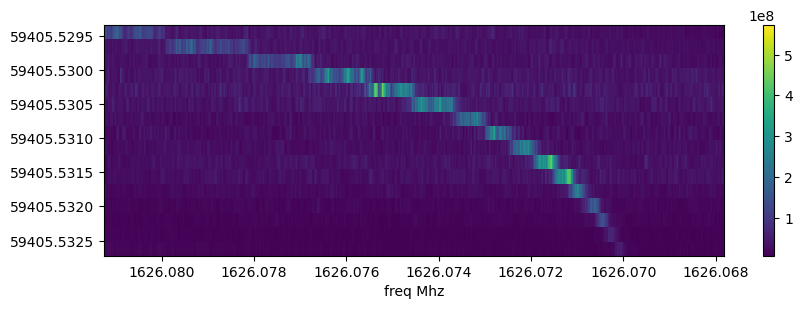

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


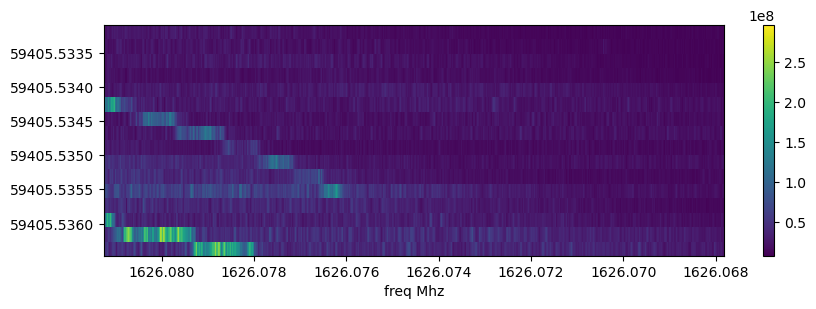

================================ 1 =======================
blc03
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.

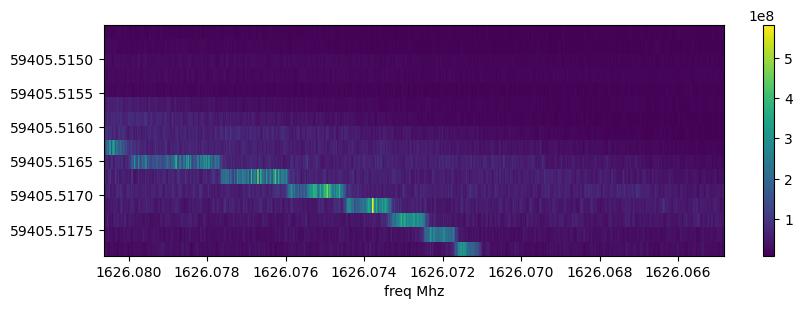

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


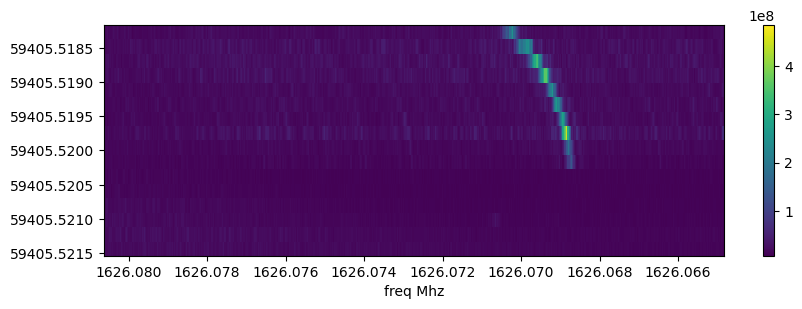

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


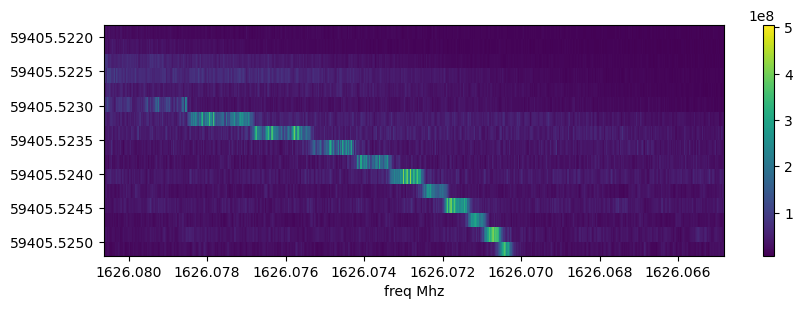

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


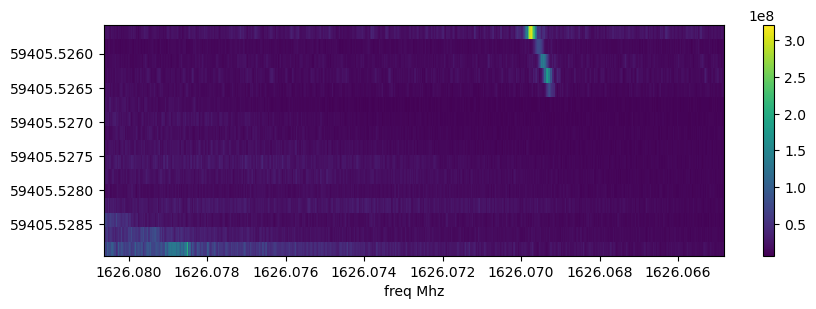

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


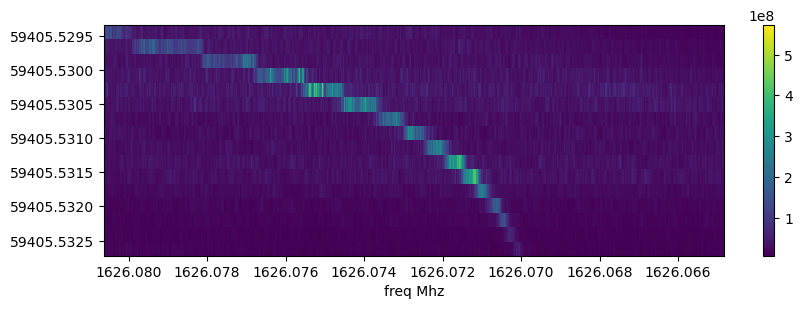

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


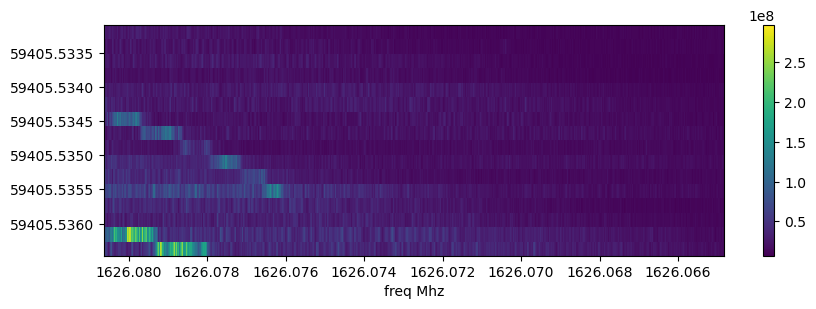

================================ 2 =======================
blc03
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.

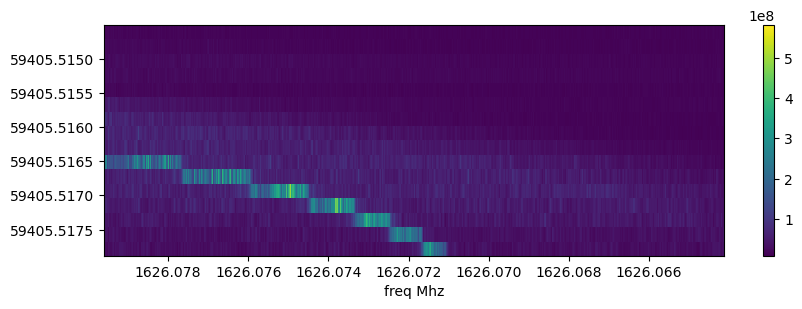

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


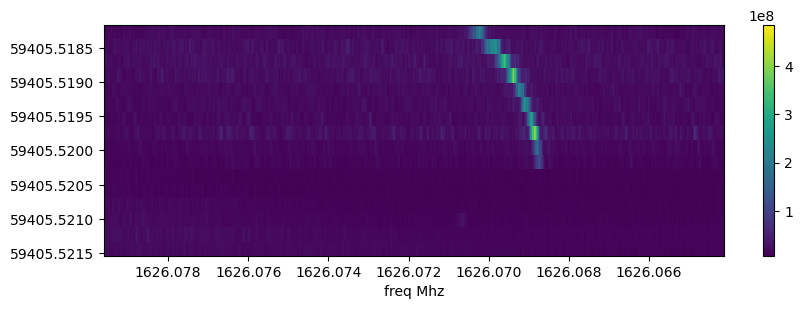

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


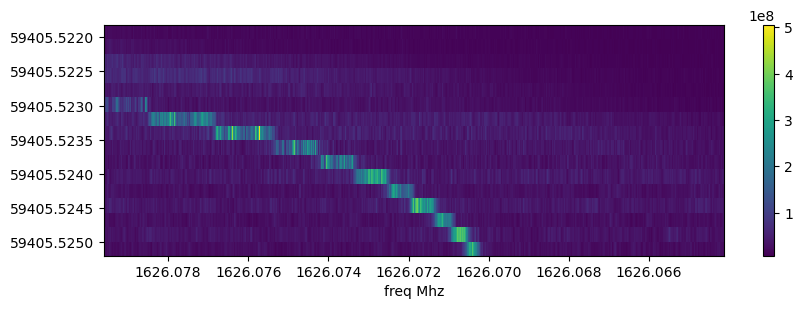

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


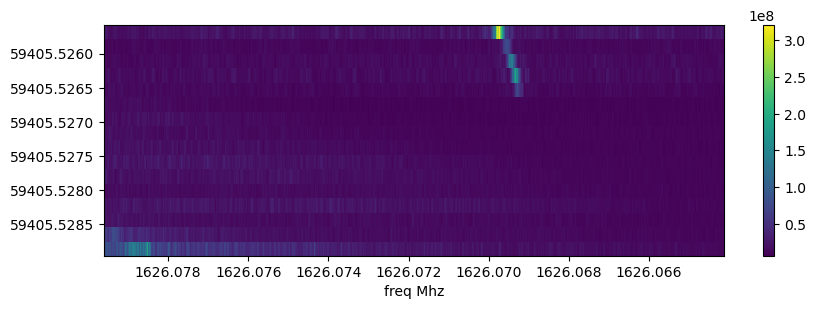

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


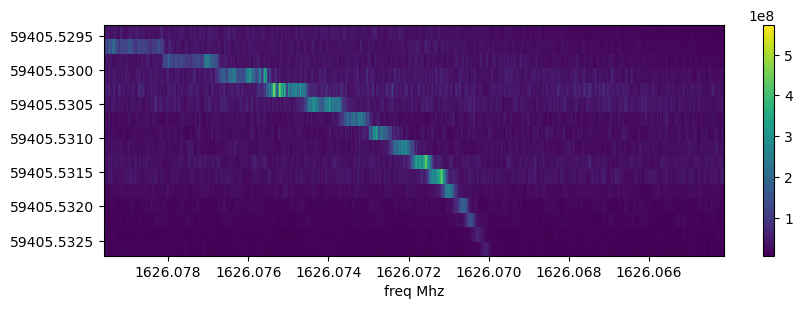

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


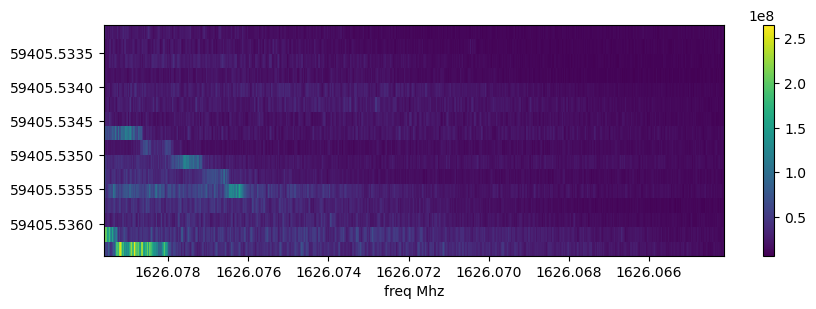

================================ 3 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

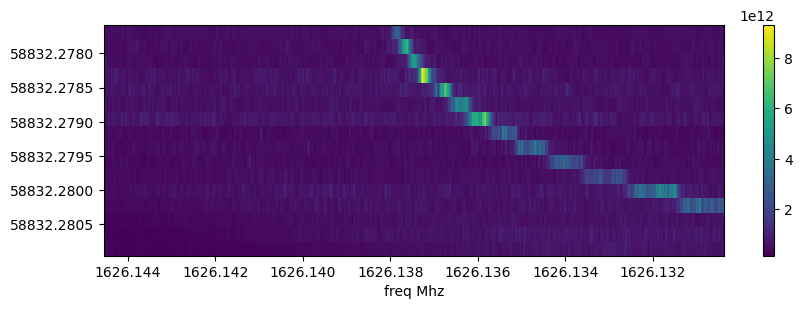

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


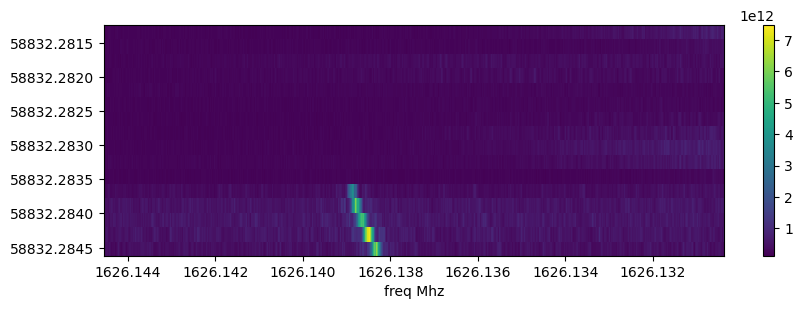

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


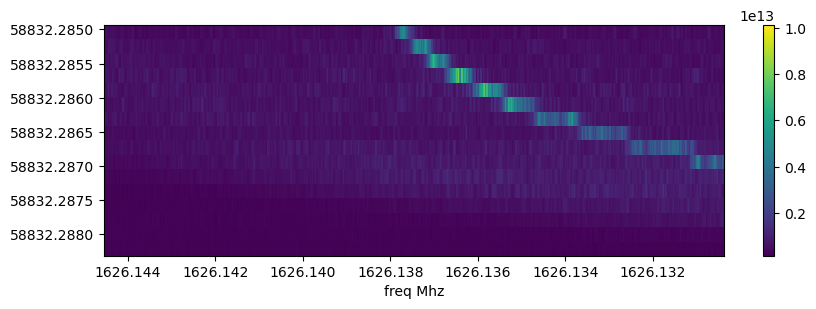

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


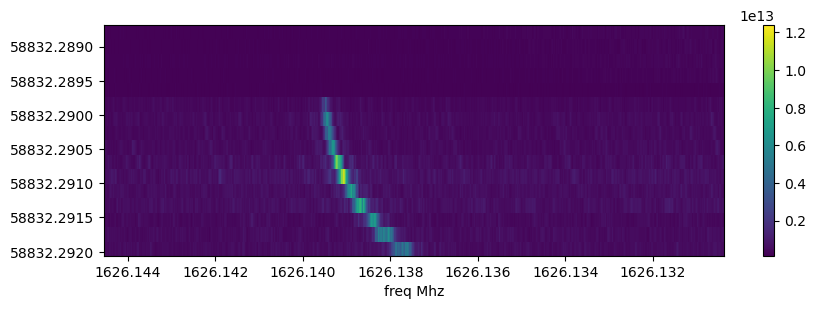

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


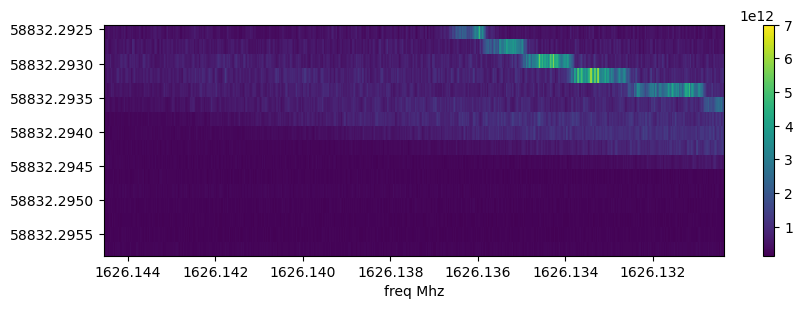

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


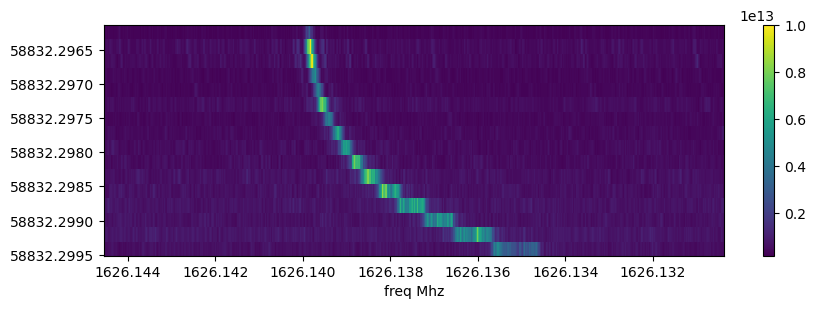

================================ 4 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

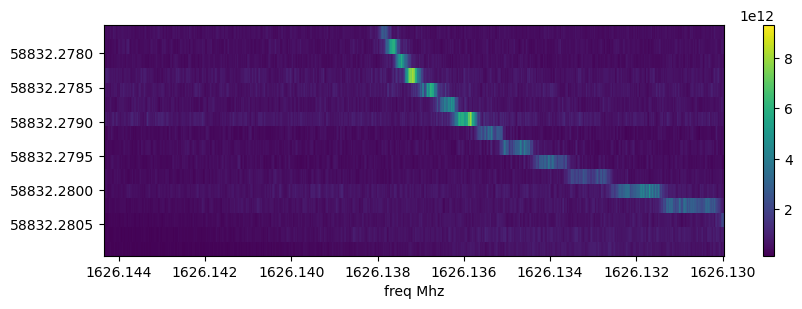

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


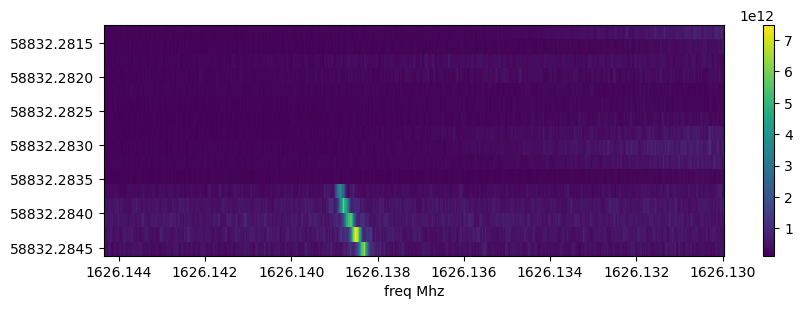

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


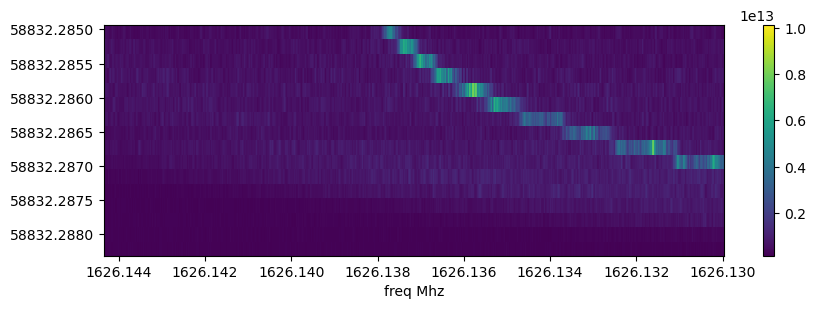

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


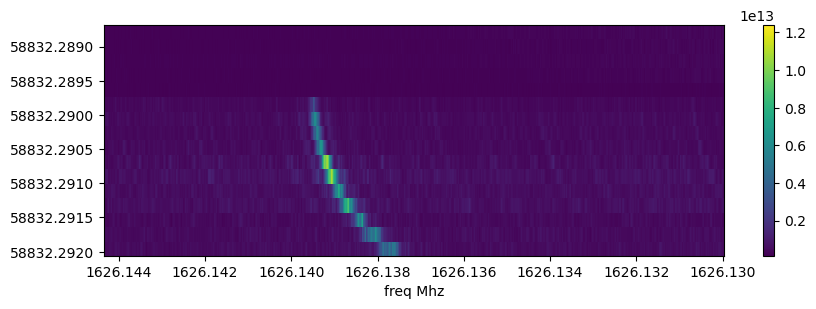

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


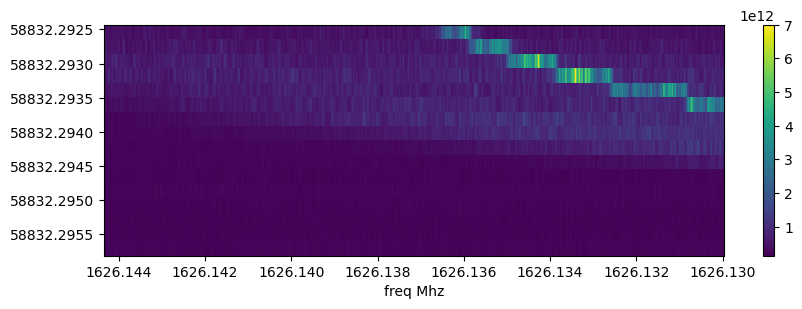

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


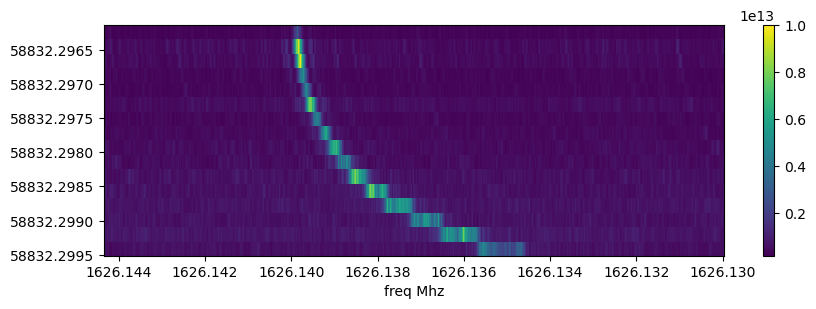

================================ 5 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

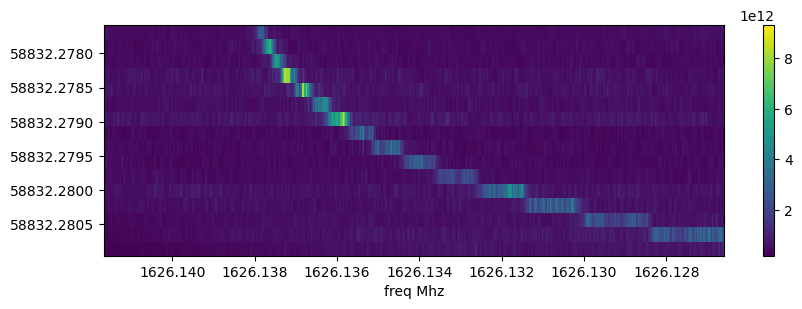

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
got data
plotted


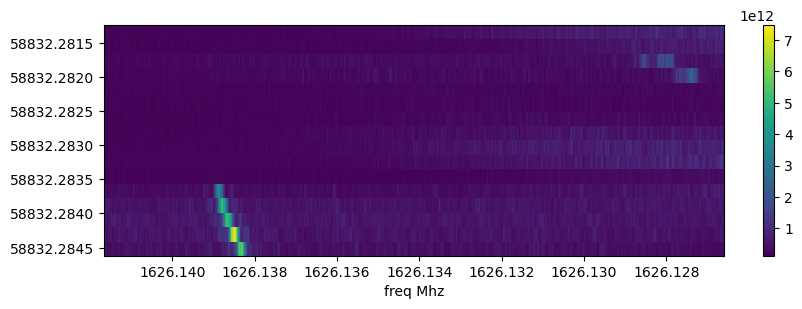

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
got data
plotted


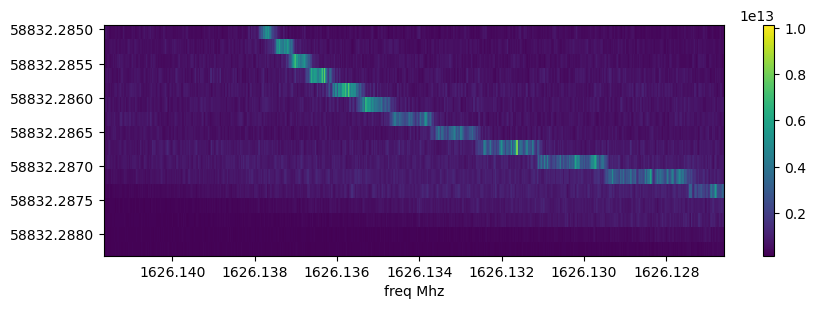

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
got data
plotted


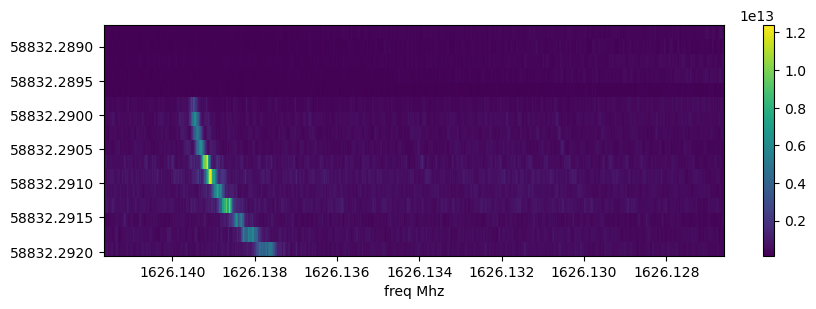

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
got data
plotted


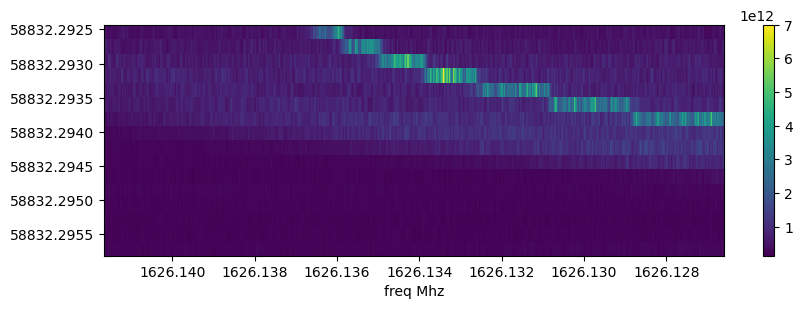

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
got data
plotted


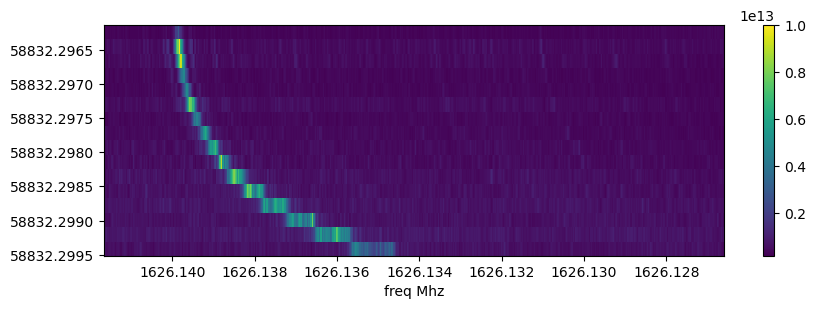

================================ 6 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

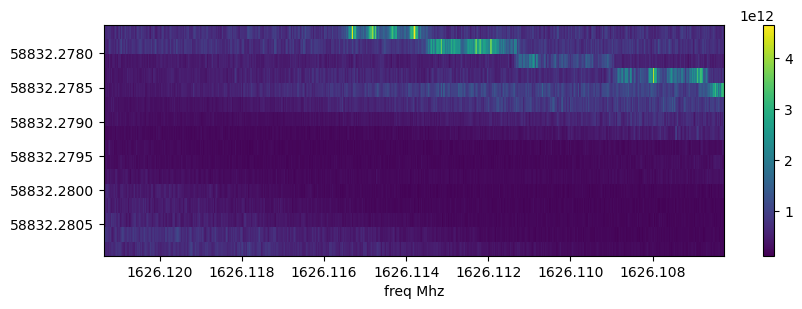

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
got data
plotted


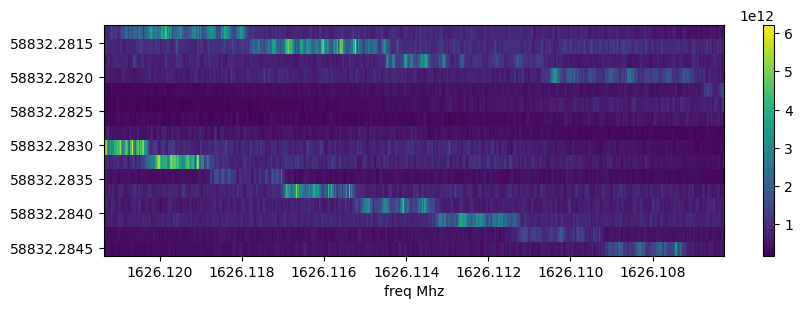

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
got data
plotted


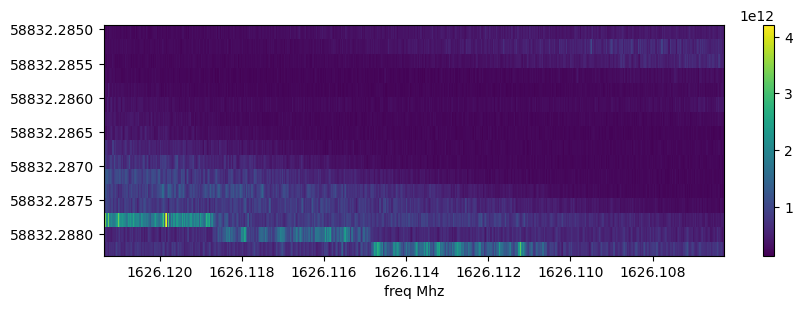

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
got data
plotted


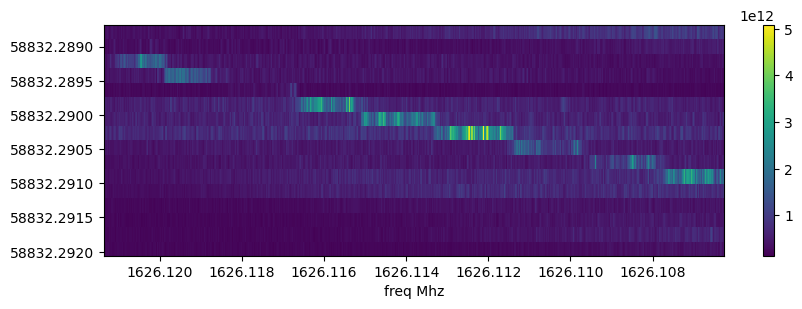

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
got data
plotted


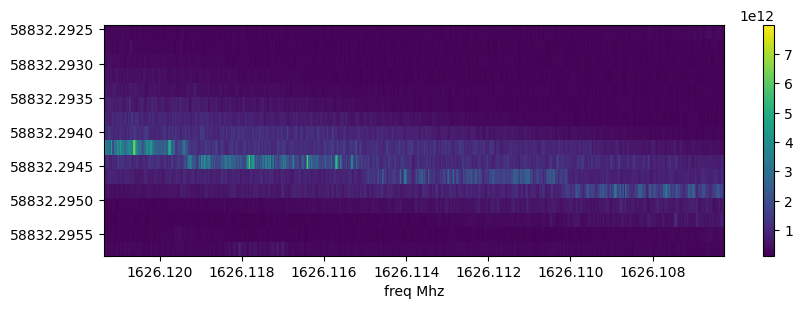

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
got data
plotted


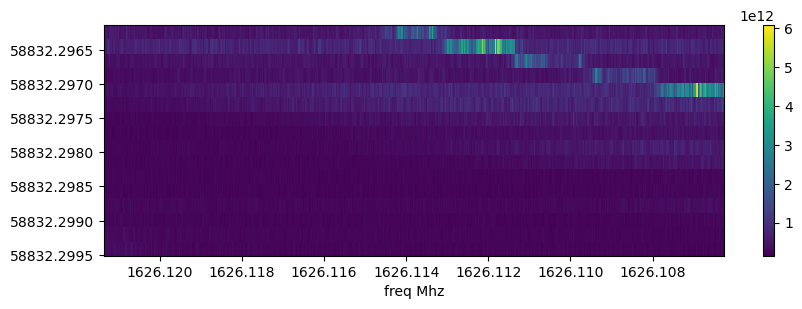

================================ 7 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

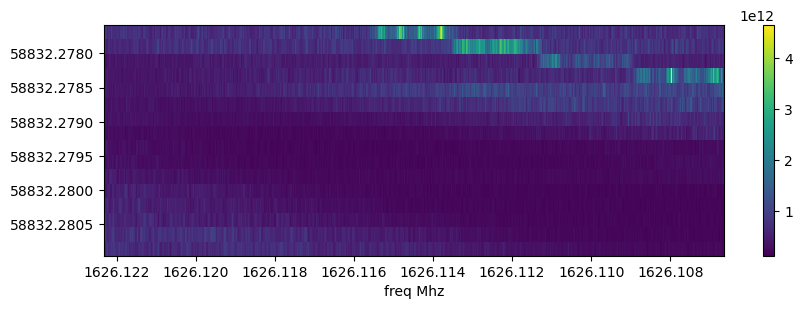

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
got data
plotted


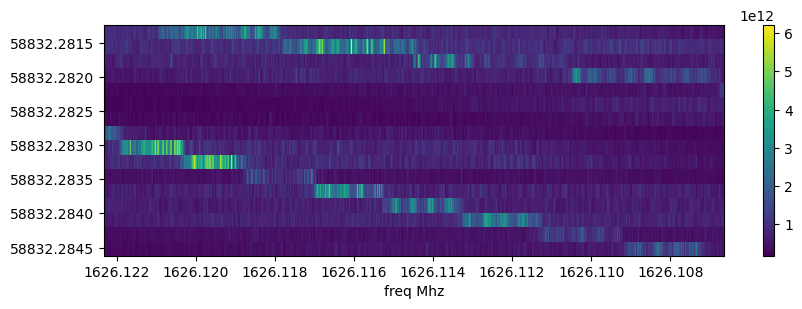

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
got data
plotted


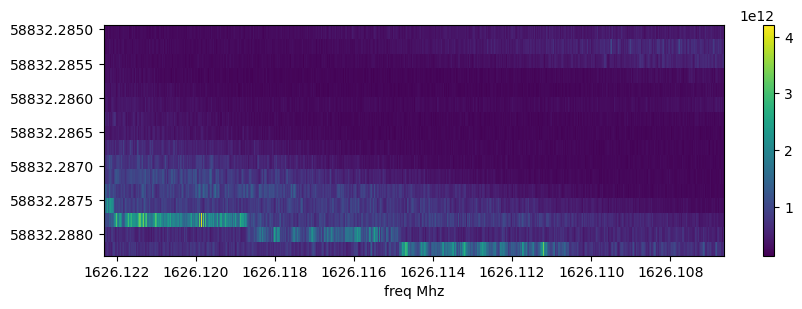

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
got data
plotted


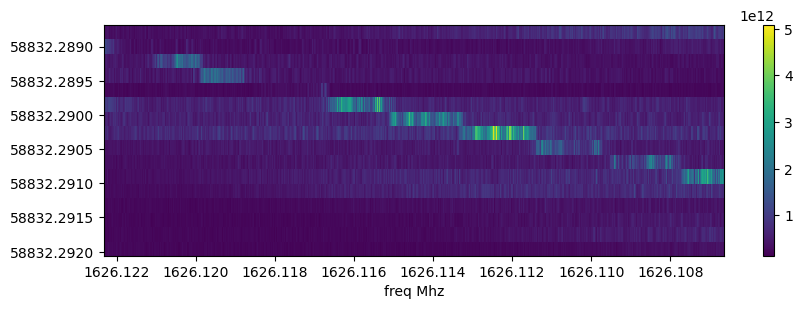

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
got data
plotted


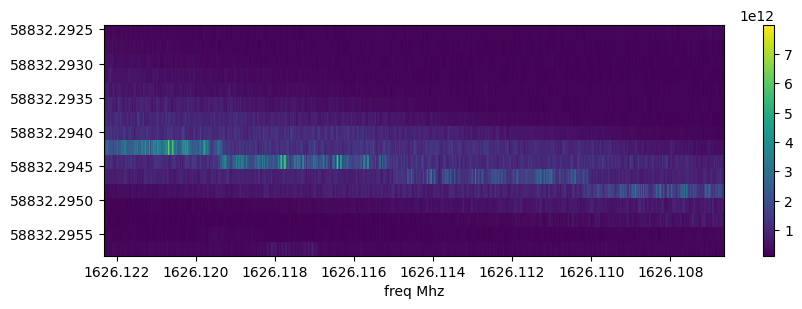

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
got data
plotted


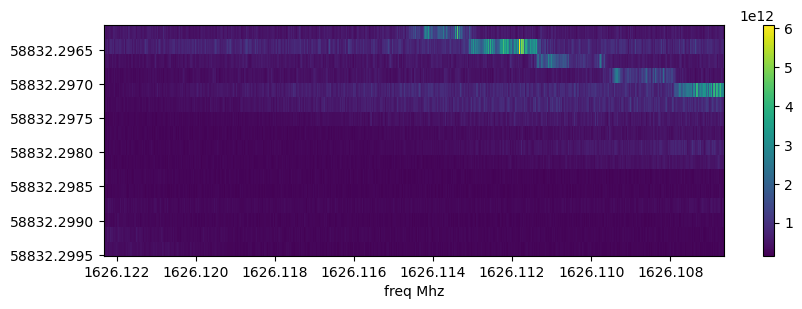

================================ 8 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

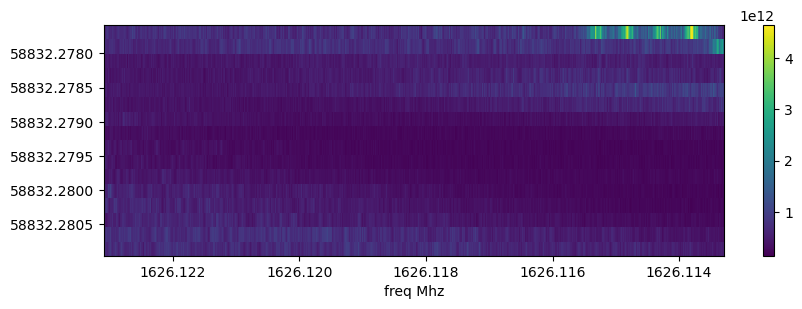

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


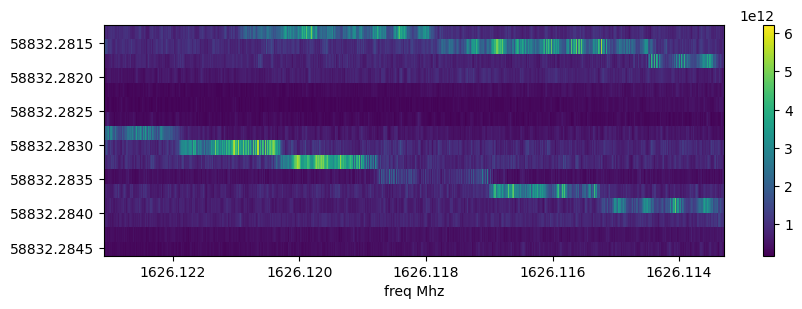

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


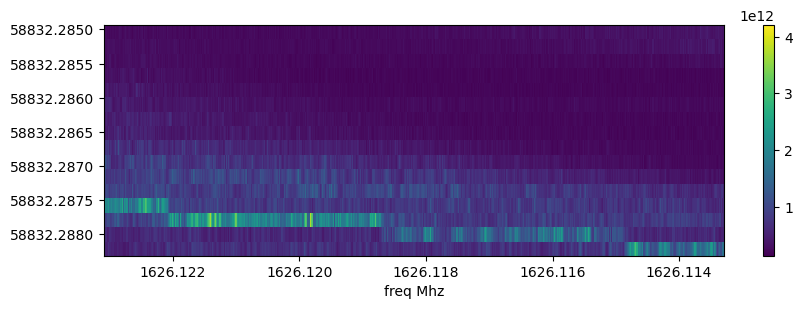

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


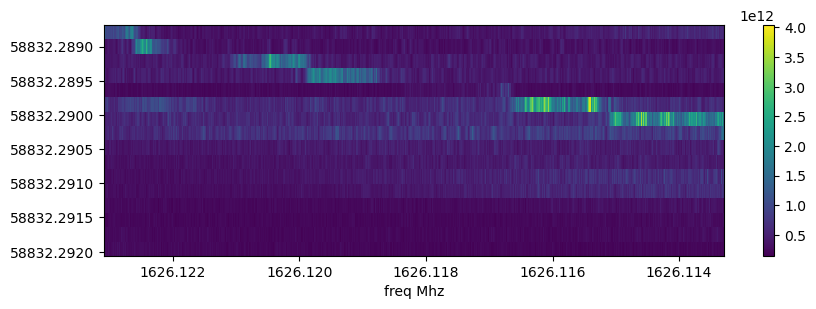

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


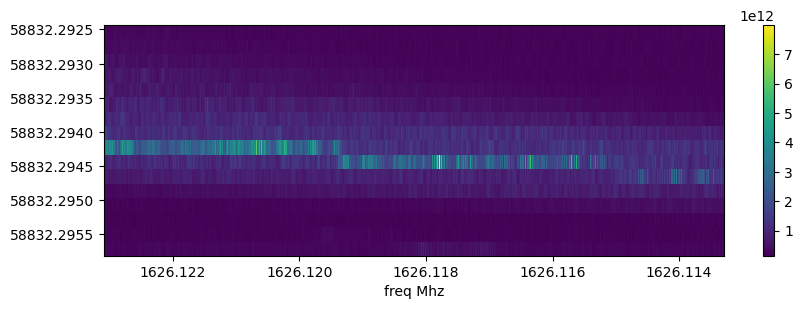

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


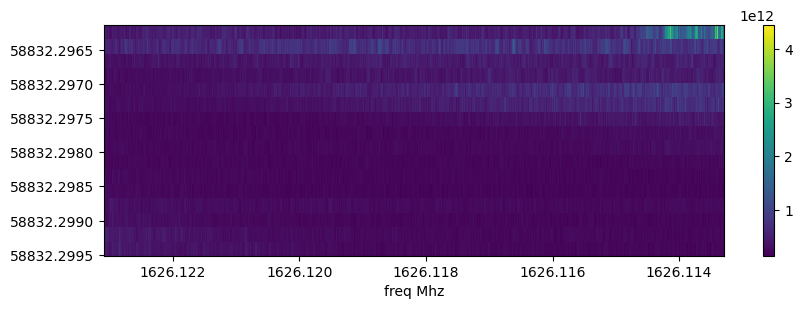

================================ 9 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.

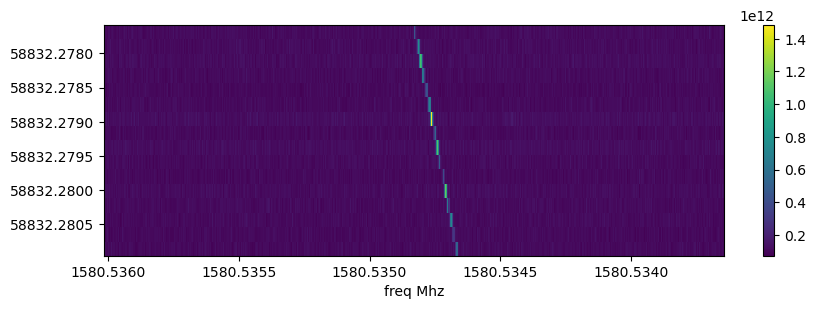

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


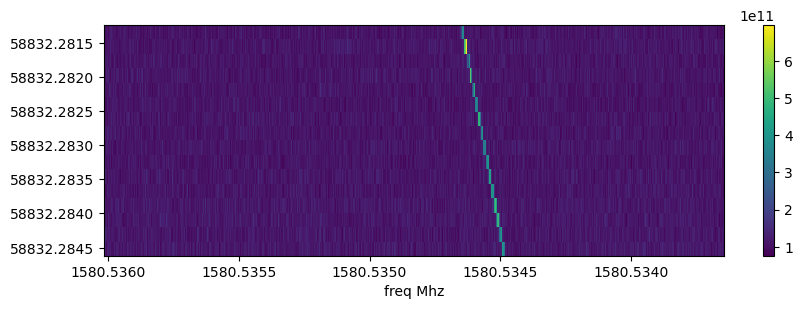

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


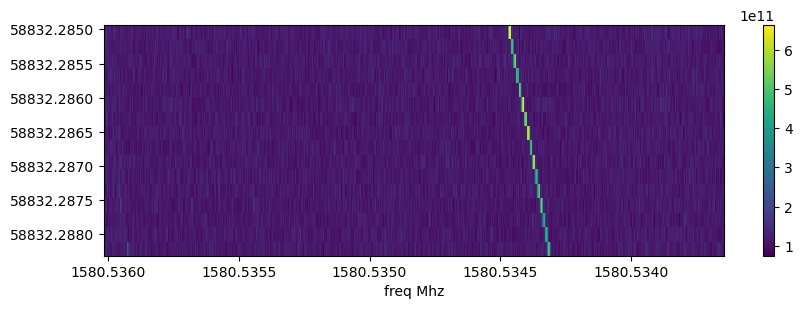

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


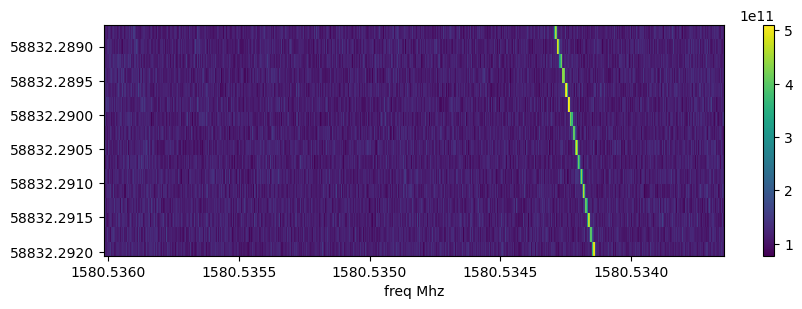

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


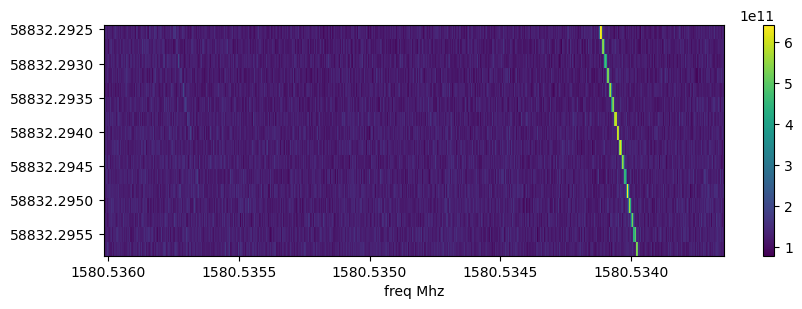

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


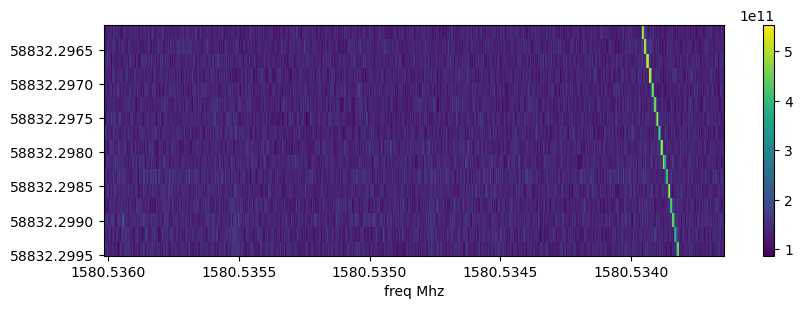

================================ 10 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000

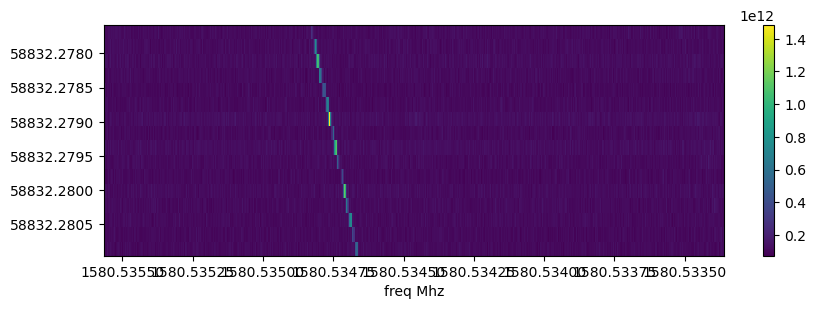

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


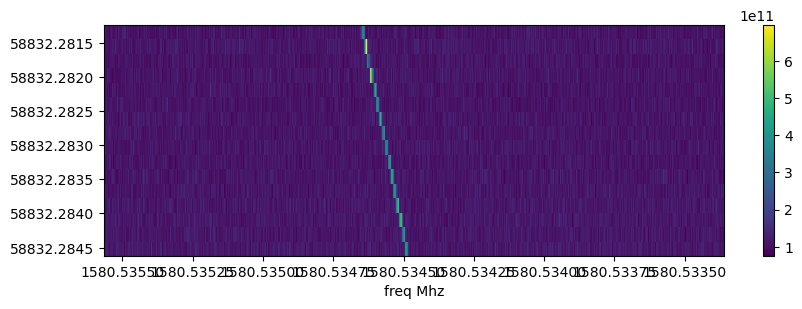

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


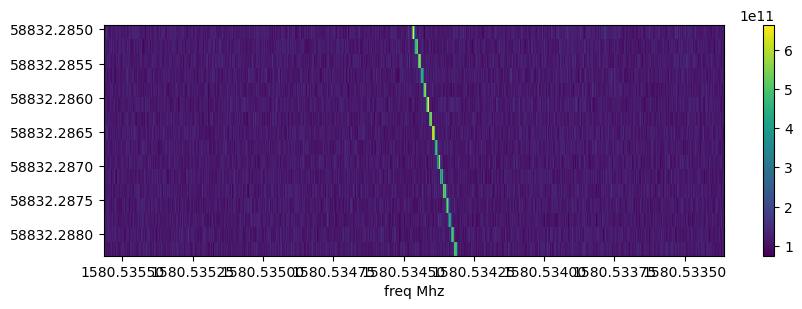

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


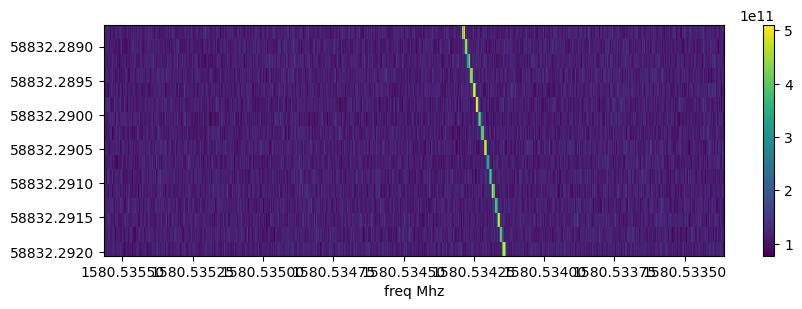

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


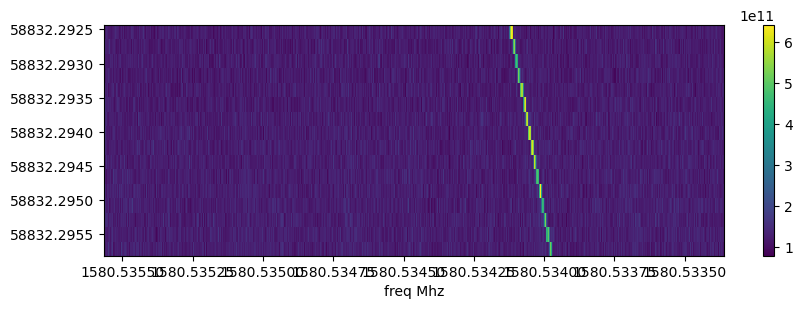

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


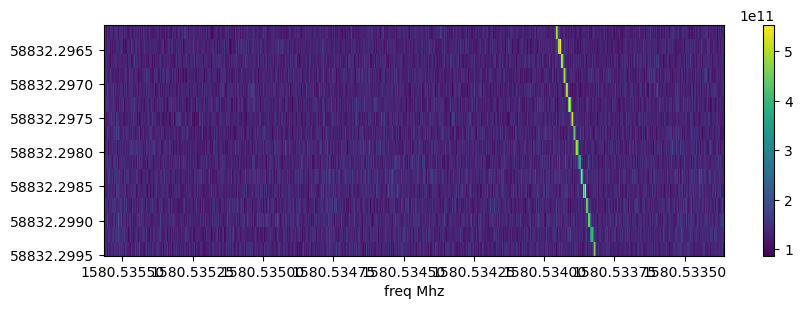

================================ 11 =======================
blc73
['/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5', '/mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5']
getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000

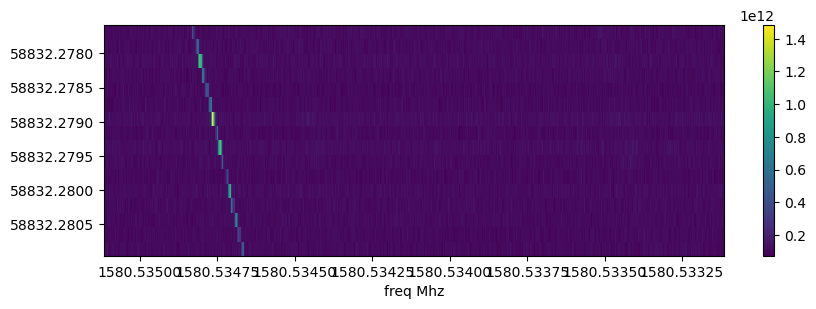

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24299_HIP5682_0082.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


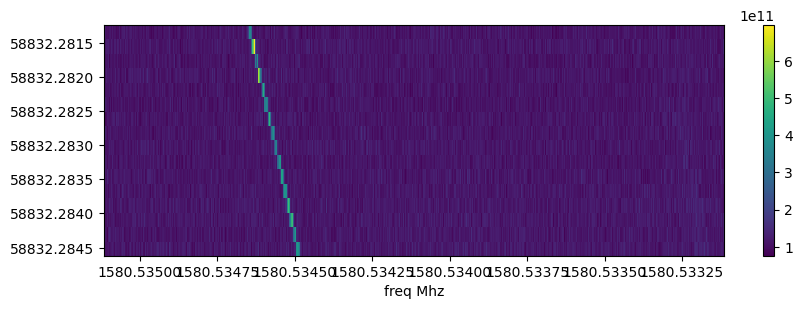

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


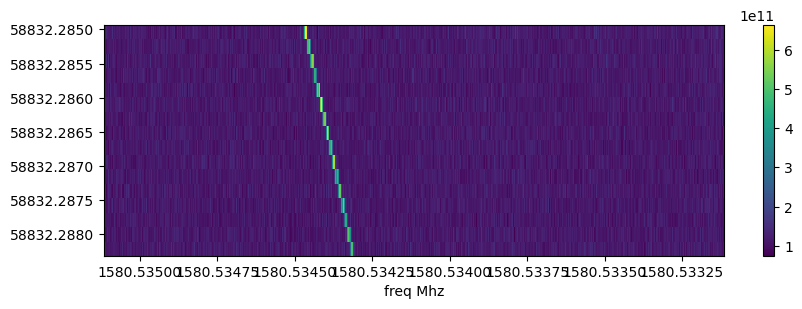

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24942_HIP6702_0084.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


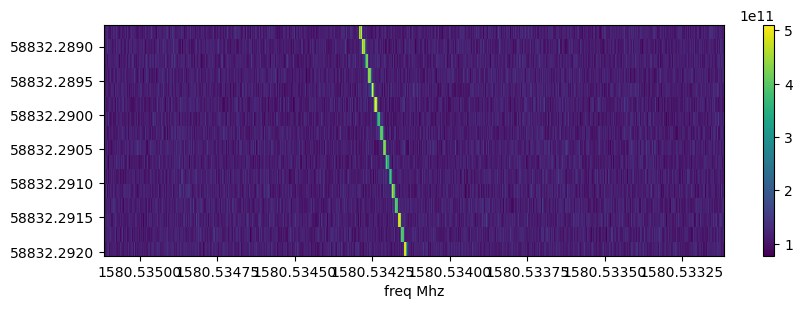

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


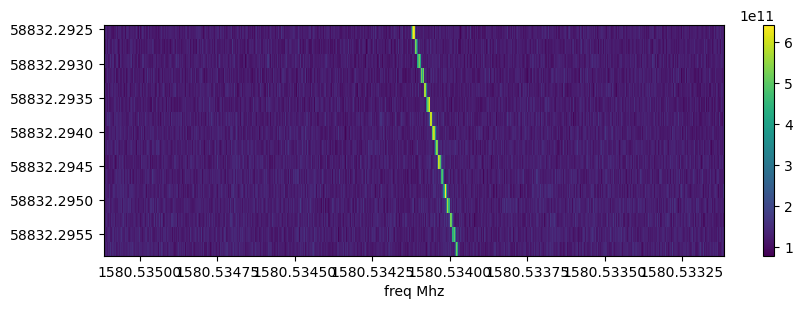

getting data /mnt_blpc1/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25586_HIP5645_0086.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.
got data
plotted


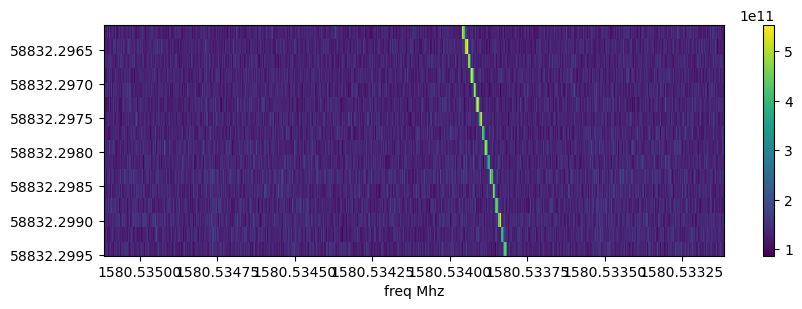

In [18]:
all_plot_data = []
all_extents = []
for i in range(0,len(all_hits)):
    print(f"================================ {i} =======================")
    file = data_dir + all_hits["FileID"][i]
    file = file[:-3]+"h5"
    drift_rate = all_hits["DriftRate"][i]
    freq = all_hits["Freq"][i]
    f_start = freq - (drift_rate/10**6)*2000
    f_end = freq + (drift_rate/10**6)*2000


    node = file.split("/")[-1][0:5]
    print(node)
    h5_list_path = grab_file_list(data_dir, '.h5',node)
    print(h5_list_path)
    for file in h5_list_path:
        plot_data, extent = plotter(file,f_start,f_end)
        all_plot_data.append(plot_data)
        all_extents.append(extent)
        plt.show()
    

In [11]:
    file = data_dir + all_hits["FileID"][2]
    file = file[:-3]+"h5"

In [12]:
all_means = []
for j in all_plot_data:
    for i in j:
        statistics = []
        df_describe = pd.DataFrame(i)
        data = df_describe.describe().loc["mean"]
        statistics.append(data)
        all_means.append(np.mean(statistics))

In [72]:
df_describe = pd.DataFrame(all_plot_data[1][3])
data = df_describe.describe()

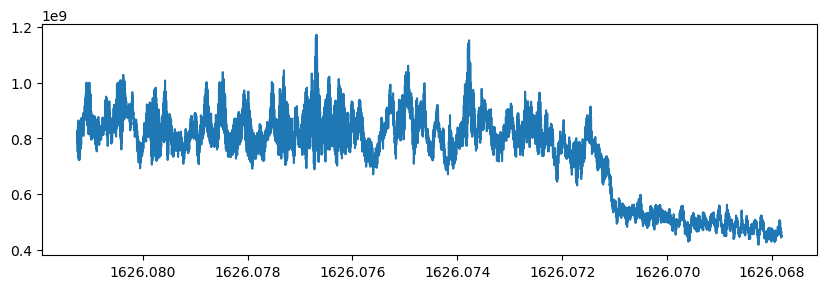

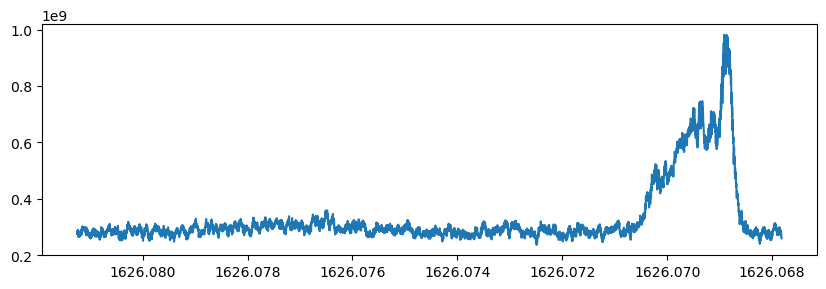

-46


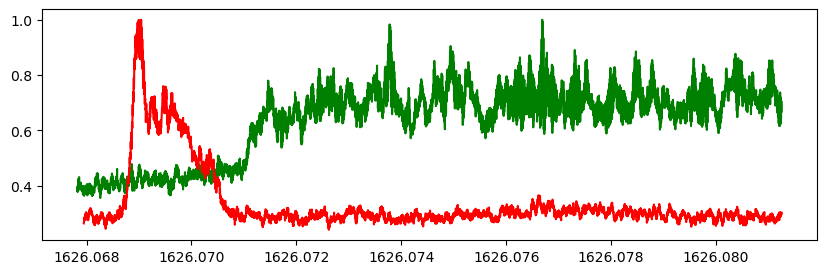

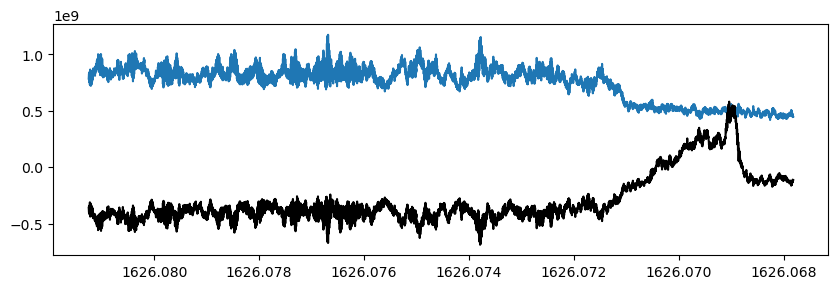

In [27]:
for i in [0,1]:
    drift_shift = (-0.428579/10**6)*300
    # print(drift_shift)
    shift_bins = int(np.ceil(drift_shift/(2.793968/10**6)))
    
    x = np.linspace(all_extents[i][0],all_extents[i][1],len(all_plot_data[i][1]))
    plt.plot(x,sum(all_plot_data[i]))
    plt.gca().invert_xaxis()
    x_shifted = [i-drift_shift for i in x]
    plt.show()
    if i == 1:
        # print('shift')
        summed = sum(all_plot_data[1])
        print(shift_bins)
        val = int(np.ceil(summed[-1]))
        # print(val)
        diff = sum(all_plot_data[0])/max(sum(all_plot_data[0])) - np.pad(summed[-shift_bins:],(0,-shift_bins),'constant',constant_values=val)/max(sum(all_plot_data[1]))
        plt.plot(x,sum(all_plot_data[0])/max(sum(all_plot_data[0])),color='green')
        plt.plot(x_shifted[-shift_bins:], summed[-shift_bins:]/max(sum(all_plot_data[1])),color='red')
        plt.show()
        plt.plot(x,sum(all_plot_data[0]))
        plt.gca().invert_xaxis()
        # plt.ylim(-.4*10**9,10**9)
        plt.plot(x,diff*(-max(sum(all_plot_data[i]))),color='black')
                                              
    plt.show()

In [21]:
all_plot_data

[array([[1763942.8 , 1327887.1 , 1027065.25, ..., 1675946.4 , 1629249.  ,
         2218417.2 ],
        [1724691.  , 2161513.  , 2344606.8 , ..., 1891227.1 , 1514517.5 ,
         1600755.2 ],
        [1316561.1 , 1290521.2 , 1689087.  , ..., 1696771.4 , 1650469.4 ,
         1706657.9 ],
        ...,
        [1292815.2 , 1294451.6 , 1117767.8 , ..., 1858689.2 , 2406238.8 ,
         1891110.4 ],
        [2836398.8 , 2901831.2 , 1269832.4 , ..., 2091346.2 , 1847794.4 ,
         1819948.6 ],
        [1447299.2 , 1800674.2 , 2746009.  , ..., 1819300.5 , 1975427.4 ,
         1944596.8 ]], dtype=float32),
 array([[1175436.8, 1527643.5, 1342492.6, ..., 1538319. , 1531878.4,
         1402342.5],
        [1187226.2, 1295372.5,  996000.5, ..., 1689154.5, 1670624.9,
         1841524.2],
        [1178797.9, 1377129.9, 1399152.5, ..., 1705900.4, 2037810.1,
         1879410.8],
        ...,
        [1335614.8, 1598559.1, 1208770.6, ..., 1526446.8, 1317231.9,
         1660370.1],
        [1221806.5, 1

In [22]:
from scipy import signal
x = all_plot_data[-6][15]
y = all_plot_data[-5][0]


In [43]:
maxi = max(y)
print(maxi)
peak = int(np.where(y==maxi)[0])
peak
spike = np.array(y[peak-10:peak+10])*2
spike = np.pad(spike,(50,len(y)-50-len(spike)),'constant',constant_values=(0,0))
fake = y+spike

9266505.0


In [44]:
# inject signal
from numpy import random

y = fake

In [45]:
corr = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")

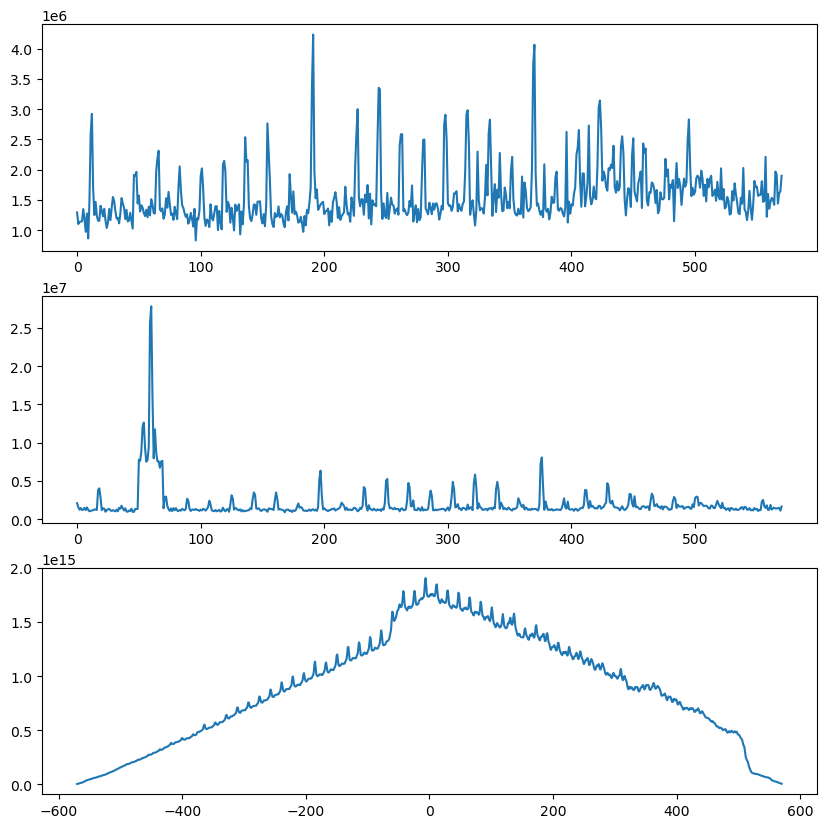

In [46]:
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(10, 10))
ax_orig.plot(x)
ax_noise.plot(y)
ax_corr.plot(lags, corr)

In [33]:
maxi = np.where(corr == np.max(corr))
shift = int(lags[0]+ maxi)
print(shift)

-6


In [268]:
my_pd=pd.DataFrame(data=[x[:-47],y[47:]]).transpose()

In [32]:
all_pearsons = []
for i in range(0,10):
    my_pd=pd.DataFrame(data=[x[:-i],y[i:]]).transpose()
    pearson = my_pd.corr().iloc[0,1]
    all_pearsons.append(pearson)

In [113]:
max(all_pearsons[2:])

0.5272001949176512

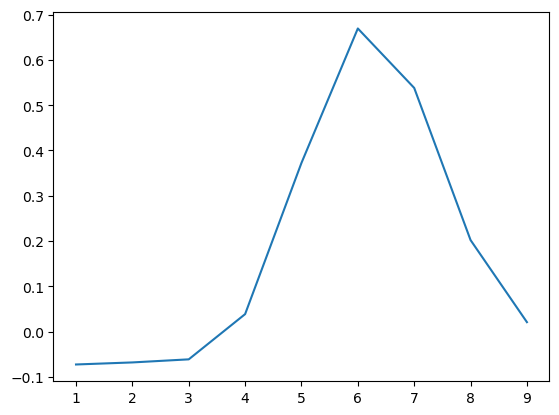

In [34]:
plt.plot(all_pearsons)

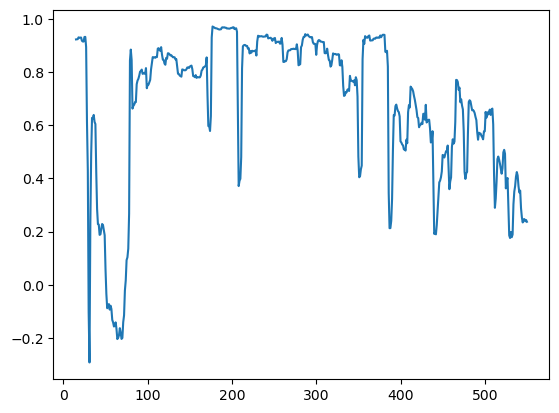

In [47]:
# rolling pearson
# Set window size to compute moving window synchrony.
r_window_size = 30
# Interpolate missing data.
# df_interpolated = y.interpolate()
df_x = pd.DataFrame(x[:-6])
df_y = pd.DataFrame(y[6:])
# Compute rolling window synchrony
rolling_r = df_x.rolling(window=r_window_size, center=True).corr(df_y)


plt.plot(rolling_r)

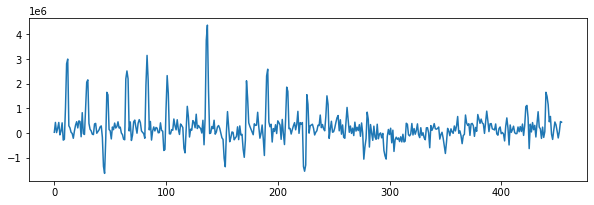

In [175]:
plt.plot(x[:-10]-y[10:])

In [ ]:
pip install setigen

In [4]:
import setigen as stg
from astropy import units as u


In [3]:
obs = blimpy.Waterfall('/mnt_blpc1/datax/scratch/calebp/HIP70497/lband/blc45_guppi_60095_70975_HIP70497_0100.rawspec.0000.h5')

extracting integration 0...


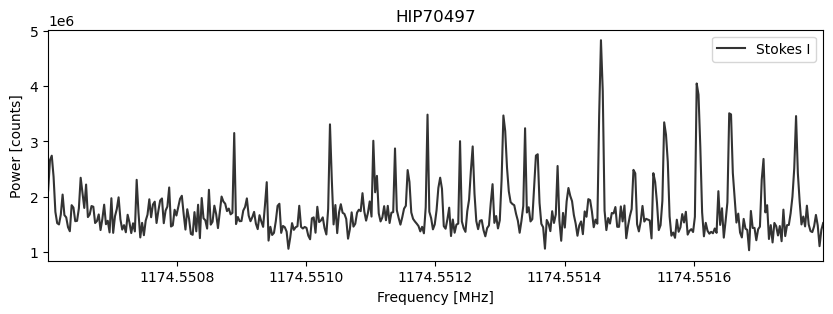

In [118]:
data =obs.plot_spectrum(f_start = 1174.5506, f_stop = 1174.5518)

In [6]:
frame = stg.Frame(waterfall = obs)

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=10)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.get_slice(0, 400).plot()

plt.show()


TypeError: h5py objects cannot be pickled

<Figure size 1000x600 with 0 Axes>

In [72]:
signal

array([[4.41924676e-229, 9.75865944e-227, 2.09740593e-224, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [8.65513248e-261, 2.72170407e-258, 8.33025898e-256, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.67174298e-294, 7.48620924e-292, 3.26290805e-289, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [247]:
help(frame)

Help on Frame in module setigen.frame object:

class Frame(builtins.object)
 |  Frame(waterfall=None, fchans=None, tchans=None, df=<Quantity 2.79396772 Hz>, dt=<Quantity 18.25361101 s>, fch1=<Quantity 6. GHz>, ascending=False, data=None, **kwargs)
 |  
 |  Facilitate the creation of entirely synthetic radio data (narrowband
 |  signals + background noise) as well as signal injection into existing
 |  observations.
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, waterfall=None, fchans=None, tchans=None, df=<Quantity 2.79396772 Hz>, dt=<Quantity 18.25361101 s>, fch1=<Quantity 6. GHz>, ascending=False, data=None, **kwargs)
 |      Initialize a Frame object either from an existing .fil/.h5 file or
 |      from frame resolution / size.
 |      
 |      If you are initializing based on a .fil or .h5, pass in either the
 |      filename or the Waterfall object into the waterfall keyword.
 |      
 |      Otherwise, you can initialize a frame by specifying th

In [66]:
frame.integrate()

array([5818115.21486335, 5809371.87215212, 5698153.11082343, ...,
       6034890.63816607, 5689702.78700137, 5701605.68065245])

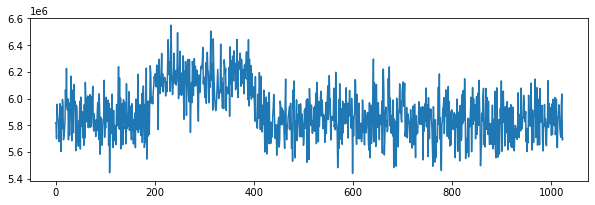

In [67]:
plt.plot(frame.integrate())